# Everything you need to know about Tensorflow 2.0

In [1]:
# # Installing and loading libraries
# !pip install tensorflow-gpu==2.0.0-beta1

In [2]:
# # download and install keras-tuner
# !git clone https://github.com/keras-team/keras-tuner.git
# !pip install ./keras-tuner

In [3]:
# import libraries
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np
import time

# Tensorflow datasets
import tensorflow_datasets as tfds
from sklearn.utils.multiclass import unique_labels
print(tf.__version__)

import time
from sklearn.metrics import confusion_matrix
from tensorflow.python.keras.callbacks import TensorBoard

2.0.0-beta1


In [4]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots(figsize=(8,8))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

## What is Tensorflow

- Tensorflow is a general purpose high-performance computing library.

![alt text](https://drive.google.com/uc?id=1s4d6Na9fSCGjF_zyVT4p5fmLFnxCa_mS)

- OpenSourced by Google in 2015

- Very Popular Machine Learning Lib.
  - **130K stars and 58k commits on Github.**

- From a Neural Network based lib to a robust ML ecosystem.


## TF 1.x vs TF 2.0

![alt text](https://drive.google.com/uc?id=1xv51KueUja9A-jNpjBswlRSOGp8tGGFx)

You could define some variables and assign values to them, but you couldn't really use them.

### Tensorflow 1.x
- tf.layers
- tf.slim
- tf.layers.contrib
- tf.keras
-tf.estimators
    
### Tensorflow 2.0

![alt text](https://drive.google.com/uc?id=1u-Hp8X9QbBDwoblNVB-syKj8DmEY2fCi)

- Eager Execution By Default
  - Code looks a lot like NumPy programming
  - Do not need to worry about **sessions**, **placeholders**, **feed_dict**, etc.
- API Cleanup
- tf.keras as the default high-level API
- Standardized was of saving models (SavedModel)

## Beginners API

- Keras is a set of layers that describes how to build neural networks using a clear standard.
- Install Tensorflow using pip and get the full Keras API


In [5]:
# load the date using keras datasets

# Choose between mnist and fashing_mnist
mnist = tf.keras.datasets.fashion_mnist

# load the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# check some statistics
IMAGE_HEIGHT, IMAGE_WIDTH = x_train.shape[1:3]
print("# of train examples:", x_train.shape[0])
print("# of test examples:", x_test.shape[0])
print("Image shape:", x_train[0].shape)
print("Pixel value interval:", np.min(x_train), np.max(x_train))
print("Train shape:",x_train.shape)
print("Test shape:",x_test.shape)

# of train examples: 60000
# of test examples: 10000
Image shape: (28, 28)
Pixel value interval: 0 255
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


In [6]:
# Normalize the data
train_mean = np.mean(x_train)
train_std = np.std(x_train)
x_train = (x_train - train_mean) / train_std
x_test = (x_test - train_mean) / train_std

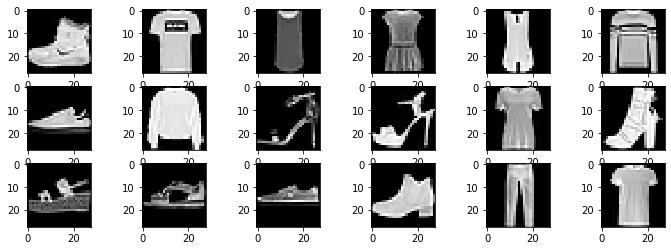

In [7]:
# visualize some of the examples
fig, axs = plt.subplots(nrows=3, ncols=6, constrained_layout=False, figsize=(12,4))
for i, ax in enumerate(axs.flat):
  ax.imshow(x_train[i], cmap="gray")

## Begginer API

##  Keras Sequential API 
- The Sequential API defines a Neural Network as a stack of layers
- Very easy to define a model and to add new layers
- You a really defining a data structure
- Minimize errors in the model definition
- Much easier to debug

## Get your hands dirty
- Define your own Neural Net
- Specify the # of units for the hidden layer
- Do not forget the **number of classes**
- Try to add more hidden layers
  - **Dense()**
  -  **Dropout()**
  - **BatchNormalization()**

In [8]:
# Tensorflow keras layers
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, AveragePooling2D, MaxPool2D

In [9]:
model = tf.keras.models.Sequential()
model.add(Flatten(input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH)))
model.add(Dense(units=..., activation='relu'))
model.add(Dropout(...))
model.add(Dense(units=..., activation='relu'))
model.add(Dense(units=10, activation='softmax'))

## Configures the model for training.

- **optimizer**: String (name of optimizer) or optimizer instance. e.g. adam, rmsprob
- **metrics**:  List of metrics to be evaluated by the model during training and testing

In [10]:
# Configures the model for training.
# Define the model optimizer, the loss function and the accuracy metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


## Setting up TensorBoard

In [11]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
%reload_ext tensorboard

# create the tensorboard callback
tensorboard = TensorBoard(log_dir='logs/{}'.format(time.time()), histogram_freq=1)

## Training

In [12]:
# train the model
model.fit(x=x_train, 
          y=y_train, 
          epochs=2, 
          validation_data=(x_test, y_test), 
          callbacks=[tensorboard])

W0625 21:22:05.253306 140736008455040 deprecation.py:323] From /Users/thalles.silva/.virtualenvs/tf2.0/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 5s 87us/sample - loss: 0.8756 - accuracy: 0.6801 - val_loss: 0.5724 - val_accuracy: 0.8007
Epoch 2/2
60000/60000 [==============================] - 5s 75us/sample - loss: 0.6472 - accuracy: 0.7585 - val_loss: 0.4975 - val_accuracy: 0.8194


In [13]:
# launch TensorBoard from Jupyter
# %tensorboard --logdir logs

## Keras-Tuner

- **Keras-tuner** is a dedicated library for hyper-parameter tuning of Keras models. 
- The lib is in **pre-alpha** status, but works fine on Colab with tf.keras and Tensorflow 2.0 beta. 

In [14]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch


def build_model(hp):
  # define the hyper parameter ranges for the learning rate, dropout and hidden unit
  hp_units = hp.Range('units', min_value=..., max_value=..., step=...)
  hp_lr = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  hp_dropout = hp.Choice('dropout', values=[0.1,0.2,0.3])

  # build a Sequential model
  model = keras.Sequential()
  model.add(Flatten(input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH)))
  model.add(Dense(units=hp_units, activation='relu'))
  model.add(Dropout(hp_dropout))
  model.add(Dense(units=32, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))

  # compile and return the model
  model.compile(optimizer=keras.optimizers.Adam(hp_lr),
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'])
  return model

In [15]:
# create a Random Search tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy', # define the metric to be optimized over
    max_trials=3,
    executions_per_trial=1,
    directory='my_logs') # define the output log/checkpoints folder

In [ ]:
# start hyper-parameter optmizatin search
tuner.search(x_train, y_train,
             epochs=2,
             validation_data=(x_test, y_test))

Name,Best model,Current model
accuracy,0.8467,0.8467
loss,0.4212,0.4212
val_loss,0.4154,0.4154
val_accuracy,0.8507,0.8507


In [ ]:
# You can print a summary of the search space:
tuner.results_summary()

In [ ]:
# get the best model
model = tuner.get_best_models(num_models=1)[0]

## Evaluation

In [ ]:
# Test your model using the test data
predictions = model.predict(x_test)
predictions = tf.argmax(predictions, axis=1)

In [ ]:
# check the confusion matrix
classes=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
plot_confusion_matrix(y_test, predictions, classes)

## Expert API

## Model Subclassing

- Feels like Python Object Oriented programming (Inspired by Chainer)

## Data Loading and Transformation

- Tensorflow datasets provide many, ready to use, datasets
- For this demo, you can use a Vision classification dataset like:
   - cifar10
   - cifar100
   - MNIST 

In [ ]:
# See available datasets
print(tfds.list_builders())

In [ ]:
# choose a dataset
# - horses_or_humans
# - cifar10
# - cifar100
# - caltech101

DATASET_NAME = 'cifar10'

In [ ]:
def read_images(features):
  image, label = features["image"], features["label"]
  return image, label

In [ ]:
def scalling(image, label, height=32, width=32):
  return tf.image.resize(image, [height, width]), label

In [ ]:
def normalize(image, label):
  image = tf.cast(image, tf.float32)
  return image/255., label

In [ ]:
BATCH_SIZE=128
EPOCHS=2

In [ ]:
# Construct a tf.data.Dataset
# tf.data.DataSet acts as an ETL (Extract Transform Load) tool
train_dataset = tfds.load(name=DATASET_NAME, split=tfds.Split.TRAIN)

# Build your input pipeline
train_dataset = train_dataset.map(read_images)
train_dataset = train_dataset.map(normalize)
train_dataset = train_dataset.shuffle(1024)
train_dataset = train_dataset.batch(BATCH_SIZE)
train_dataset = train_dataset.repeat(1)
train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
# Construct a testing tf.data.Dataset
test_dataset = tfds.load(name=DATASET_NAME, split=tfds.Split.TEST)
test_dataset = test_dataset.map(read_images)
test_dataset = test_dataset.map(normalize)
test_dataset = test_dataset.repeat(1)
test_dataset = test_dataset.batch(1024)

In [ ]:
IMAGE_HEIGHT = None
IMAGE_WIDTH = None
IMAGE_DEPTH = None
N_CLASSES = None

## Visualize some examples

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=12, constrained_layout=False, figsize=(22,4))

data, labels = next(test_dataset.__iter__())

IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_DEPTH = data.shape[1:]

for i, ax in enumerate(axs.flat):
  ax.imshow(np.squeeze(np.reshape(data[i], (IMAGE_HEIGHT,IMAGE_WIDTH, IMAGE_DEPTH))))
  
plt.show()
N_CLASSES=len(np.unique(labels))

In [ ]:
print("IMAGE HEIGHT:",IMAGE_HEIGHT)
print("IMAGE WIDTH:",IMAGE_WIDTH)
print("IMAGE DEPTH:",IMAGE_DEPTH)
print("NUMBER OF CLASSES:",N_CLASSES)

## Model Subclassing
- Build a Python Class and extend the **tf.keras.Model** class provided by TF.
- Define the model layers in the Class *Constructor*
- Define the model's forward pass in the *call()* method

## Define your model below
- Define the number of filters for each conv layer
- Define the size of the kernel for each conv layer
- Try to add more layers

In [ ]:
class Model(tf.keras.Model):
  def __init__(self):
    # Define the layers here
    super(Model, self).__init__()
    self.conv1 = Conv2D(filters=..., kernel_size=..., padding="same", strides=1, input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,IMAGE_DEPTH))
    self.conv2 = Conv2D(filters=..., kernel_size=..., padding="same", strides=1)
    self.pool = MaxPool2D(pool_size=2, strides=2, padding="same")
    self.flat = Flatten()
    self.probs = Dense(units=N_CLASSES, activation='softmax', name="output")
  
  def call(self, x):
    # Define the forward pass
    net = self.conv1(x)
    net = self.pool(net)
    net = self.conv2(net)
    net = self.pool(net)
    net = self.flat(net)
    net = self.probs(net)
    return net
  
  def compute_output_shape(self, input_shape):
    # You need to override this function if you want to use the subclassed model
    # as part of a functional-style model.
    # Otherwise, this method is optional.
    shape = tf.TensorShape(input_shape).as_list()
    shape[-1] = self.num_classes
    return tf.TensorShape(shape)

In [ ]:
# create the model
model = Model()

## Training

- Both models (Sequential and Subclassing) can be trained using the fit() method.
- The fit() method works either with:
  - **tf.data.Dataset**
  - **NumPy nd-arrays**

In [ ]:
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# # train the model
# model.fit(train_dataset, epochs=2,
#           validation_data=test_dataset)

# _ = model.evaluate(test_dataset)

## Advanced Training loop

If you want a clear understanding of what is going on during training, you can define the training loop by yourself using the **Gradient Tape**.

- Forward pass
- Loss function evaluation
- Backward pass
- Gradient descent step

That is the best choice if:

- You are doing research
- You want to get a clear sense of Backprop and Gradient Descent steps.
- You need to inspect your loss function w.r.t the weights or the gradient values.

**More flexibility comes with an extra cost.**

Best practices.
- For Software Engineering, the fit() method has many more advantages 
- You can spot bugs faster
- Code is written is a more standardized way

In [ ]:
# define the loss function and the optimizer
cross_entropy = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
optimizer = tf.keras.optimizers.Adam()

In [ ]:
# Define the metrics and a loss function accumulator
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [ ]:
# @tf.function
def train_step(images, labels):

  with tf.GradientTape() as tape:
    # forward pass
    predictions = model(images)
    
    # compute the loss
    loss = cross_entropy(tf.one_hot(labels, N_CLASSES), predictions)
  
  # get the gradients w.r.t the model's weights
  gradients = tape.gradient(loss, model.trainable_variables)
  
  # perform a gradient descent step
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))
  
  # accumulates the training loss and accuracy
  train_loss(loss)
  train_accuracy(labels, predictions)

In [ ]:
# @tf.function
def test_step(images, labels):
  # Perform inference, and assess model accuracy 
  predictions = model(images)
  t_loss = cross_entropy(tf.one_hot(labels, N_CLASSES), predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [ ]:
for epoch in range(EPOCHS):
  start = time.time()
  for x_batch, y_batch in train_dataset:
    train_step(x_batch, y_batch)
    
  end = time.time()-start
  
  # evaluate 
  for test_images, test_labels in test_dataset:
    test_step(test_images, test_labels)

  template = 'Epoch {}, Loss: {:0.2f}, Accuracy: {:0.2f}, Test Loss: {:0.2f}, Test Accuracy: {:0.2f}, Time taken for epoch is {:0.2f} sec'
  print (template.format(epoch+1,
                         train_loss.result(),
                         train_accuracy.result()*100,
                         test_loss.result(),
                         test_accuracy.result()*100,
                         end))

## Extracting Performance of your EagerCode

- If you choose to train your model using Gradient Tape, you will notice a substantial decrease in performance

- In TF 2.0 you can take advantage of Graph performance by using *tf.function*

- If you decorate a python function with **tf.function**, TF will take your function and convert it to a TF high-performance abstraction

- With tf.function, **you loose some of the benefits of eager execution**.

**Try to decorate the training step function with with tf.function**

In [ ]:
predictions = []
labels = []
for test_images, test_labels in test_dataset:
  probabilities = model(test_images.numpy())
  predictions.extend(tf.argmax(probabilities, axis=1))
  labels.extend(test_labels.numpy())
  
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
plot_confusion_matrix(labels, predictions, classes)

## Save and Restore Models

- Single API to save and load models - The SavedModel
- You can also save keras models using (HDF5 format)

In [ ]:
# serialize your model to a SavedModel object
# It includes the entire graph, all variables and weights
try:
  model.save('./saved_model', save_format='tf')
except NotImplementedError:
  tf.keras.experimental.export_saved_model(model, '/saved_model')
  
!ls ./saved_model

## Load the Saved Model and Reevaluate it

- SavedModels are integrated with the Tensorflow ecosystem.
- You can deploy a SavedModel to many different devices like Raspberry Pi, Edge TPUs or your phone.

In [ ]:
# load your saved model
model = tf.keras.models.load_model('./saved_model')
# model.summary()

In [ ]:
predictions = []
labels = []
for test_images, test_labels in test_dataset:
  probabilities = model(test_images.numpy())
  predictions.extend(tf.argmax(probabilities, axis=1))
  labels.extend(test_labels.numpy())
  
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
plot_confusion_matrix(labels, predictions, classes)

## Converting to TF Lite

- You can do post-processing quantization with the TFLiteConverter
- Set the optimizations flag to "OPTIMIZE_FOR_SIZE"

In [ ]:
# create a TF Lite converter 
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# performs model quantization to reduce the size of the model and improve latency
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

tflite_model = converter.convert()

## Converting to Tensorflow.js

In [ ]:
# !pip install tensorflowjs

In [ ]:
# !pip uninstall tensorflow
# !pip install tensorflow==2.0.0-beta1

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
!tensorflowjs_converter --version

In [ ]:
!tensorflowjs_converter \
    --input_format=tf_saved_model \
    --saved_model_tags=serve \
    --output_format=tfjs_graph_model \
    ./saved_model \
    ./web_model